# Лабораторная работа 4. Реализация стека/дека. 

## Реализовать следующие структуры данных:
## ● Стек (stack):
##    операции для стека: инициализация, проверка на пустоту, добавление
##    нового элемента в начало, извлечение элемента из начала;
## ● Дек (двусторонняя очередь, deque):
##    операции для дека: инициализация, проверка на пустоту, добавление
##    нового элемента в начало, добавление нового элемента в конец,
##    извлечение элемента из начала, извлечение элемента из конца.


# Задание:
## Разработать программу обработки данных, содержащихся в заранее подготовленном txt-файле, в соответствии с заданиями, применив указанную в задании структуру данных. Результат работы программы вывести на экран и сохранить в отдельном txt-файле.

# СТЕК

In [34]:
## Верхний элемент стека находится в конце списка
class Stack:
    ## Создание списка
    def __init__(self):
         self.items = []
    ## Проверка на наличие элементов с списке       
    def isEmpty(self):
         return len(self.items)==0
    ## Рост стека, добавление элемента в конец списка    
    def push(self, item):
         self.items.append(item)
    ## Списковый метод, который удаляет последний элемент списка        
    def pop(self):
         return self.items.pop()
    ## Возвращает последний элемент    
    def peek(self):
        if self.isEmpty():
            return None
        else:
            return self.items[-1]
    ## Возращает длину списка   
    def __len__(self):
         return len(self.items)


# ДЕК

In [65]:
class Deque:
    ## Создание списка
    def __init__(self):
        self.items = []
    ## Проверка на пустоту
    def isEmpty(self):
        return len(self.items)==0
    ## Добавление элементов вправо
    def add_Right(self, item):
        self.items.append(item)
    ## Добавление элементов влево    
    def add_Left(self, item):
        self.items.insert(0,item)
    ## Удаление первого элемента списка    
    def removeRight(self):
        return self.items.pop()
    ## Удаление последнего элемента списка
    def removeLeft(self):
        return self.items.pop(0)
    ## Возвращает первый элемент
    def peek_left(self):
        if self.isEmpty():
            return None
        else:
            return self.items[0]
    ## Возвращает последний элемент
    def peek_right(self):
        if self.isEmpty():
            return None
        else:
            return self.items[-1]
    ## Возвращает длину списка
    def __len__(self):
        return len(self.items)

# Задание № 1

1. Отсортировать строки файла, содержащие названия книг, в алфавитном порядке с использованием двух деков

In [53]:
import copy
import codecs
#чтение и запись в файл

# Вывод из файла в стек
def add_with_Stack(file):
    st=Stack()
    try:
        f=open(file,'r', encoding="utf-8")
        t=f.readlines()
        f.close()
        for i in range(len(t)):
            st.add(t[i])
        return st
    except:
        print("Ошибка-1, не удалось найти файл")

        
# Вывод файла в переменную типа string
def add_with_str(file):
    rez=""
    try:
        f=codecs.open(file+'.txt', 'r', encoding='utf-8')
        t=f.readlines()
        f.close()
        for i in range(len(t)):
            rez=rez+t[i]
        return rez
    except:
        print("Ошибка-2, не удалось найти файл")
        
# Вывод из файла в дек
def add_with_Deque(file):
    st = Deque()
    try:
        f=codecs.open(file+'.txt', 'r', encoding='utf-8')
        t=f.readlines()
        f.close()
        for i in range(len(t)):
            st.add_Left(t[i])
        return st
    except:
        print("Ошибка-3, не удалось найти файл")

# Запись из дека в файл
def add_file(file, Deque):
    try:
        f=open(file,"w", encoding="utf-8")
        while not Deque.isEmpty():
            f.write(Deque.removeLeft())
        f.close()
    except:
        print("Ошибка")
        return None

def add_file_Stack(file, Stack):
    try:
        f=open(file,'r', encoding="utf-8")
        while not Stack.isEmpty():
            f.write(Stack.pop())
        f.close()
    except:
        print("Ошибка")
        return None

# Ввод из переменной в файл
def add_file_str(file, text):
    try:
        f=open(file+'.txt',"w", encoding="utf-8")
        f.write(text)
        f.close()
    except:
        print("Ошибка")
        return None

In [88]:
s="hello world!"
print(add_file_str('rezult', s))
print(add_with_str('rezult'))

None
hello world!


In [66]:
def zadanie1(file_res, file_rezult):
    st1=add_with_Deque(file_res)
    if st1==None:
        return
    st2= Deque()
    while not st1.isEmpty():
        el=st1.removeLeft()
        while not st2.isEmpty() and st2.peek_left()<el:
            st1.add_Right(st2.removeLeft())
        st2.add_Left(el)
    
    add_file(file_rezult, copy.deepcopy(st2))
    return st2
            
file_one=input("Введите название исходного файла ")
file_two=input("Введите название файла в который хотите записать результат ")
r=zadanie1(file_one, file_two)
if r is not None:
    while not r.isEmpty():
        print(r.removeLeft())

Введите название исходного файла zadanie1
Введите название файла в который хотите записать результат rez1








1984

Кладбище домашних животных

Мы

Над пропастью во ржи
Оно



# Задание № 2

2. Дек содержит последовательность символов для шифровки сообщений. Дан
текстовый файл, содержащий зашифрованное сообщение. Пользуясь деком,
расшифровать текст. Известно, что при шифровке каждый символ сообщения
заменялся следующим за ним в деке по часовой стрелке через один.

In [114]:
import random
def Shifr():
    alphabet = list('абвгдеёжзийклмнопрстуфхцчшщъыьэюя')
    random.shuffle(alphabet)
    alphabet = ''.join(alphabet)
    #print(alphabet)
    keyRing = Deque()
    for letter in alphabet:
        keyRing.add_Right(letter)
    return keyRing

In [115]:
# Зашифровываем сообщение из файла
def encode(file, keyRing):
    text=add_with_str(file)
    if text is None:
        return
    encode_text=''
    for i in range(len(text)):
        t=text[i]
        #print(text)
        #print(t)
        if t==" ":
            encode_text=encode_text+" "
            continue
        while not keyRing.isEmpty():
            key=keyRing.removeLeft()
            if key==t:
                keyRing.add_Right(key)
                r=keyRing.removeLeft()
                encode_text=encode_text+r
                keyRing.add_Right(r)
                break
            keyRing.add_Right(key)
    add_file_str(file, encode_text)

def decode(file, keyRing):
    encode_text=add_with_str(file)
    if encode_text is None:
        return
    decode_text=''
    for i in range(len(encode_text)):
        enc=encode_text[i]
        if enc==" ":
            decode_text=decode_text+" "
        while not keyRing.isEmpty():
            key=keyRing.removeRight()
            if key==enc:
                keyRing.add_Left(key)
                r=keyRing.removeRight()
                decode_text=decode_text+r
                keyRing.add_Left(r)
                break
            keyRing.add_Left(key)
    add_file_str('zadanie2', decode_text)
keyR = Shifr() #создаем кодировку
encode('zadanie2', keyR)
decode('zadanie2', keyR)

# Задание № 3

3. Даны три стержня и n дисков различного размера. Диски можно надевать на стержни, образуя из них башни. Перенести n дисков со стержня А на стержень С, сохранив их первоначальный порядок. При переносе дисков необходимо соблюдать следующие правила: 
- на каждом шаге со стержня на стержень переносить только один диск;
- диск нельзя помещать на диск меньшего размера; 
- для промежуточного хранения можно использовать стержень В. 
Реализовать алгоритм, используя три стека вместо стержней А, В, С. Информация о дисках хранится в исходном файле. 

In [6]:
def move(a,b):
    if a.isEmpty() and not b.isEmpty():
        a.push(b.pop())
    elif  not a.isEmpty() and b.isEmpty():
        b.push(a.pop())
    elif a.isEmpty() and b.isEmpty():
        return
    elif a.peek()>b.peek():
        a.push(b.pop())
    else:
        b.push(a.pop())       
def zadanie_3(file):
    A=Stack()
    B=Stack()
    C=Stack()
    st=add_with_str(file)
    if st is None:
        return
    disk=st.split(" ")
    for i in range(len(disk)):
        print(disk[i])
        A.push(int(disk[i]))
    print("len",len(disk))   
    if len(disk)%2==0:
        while len(C) is not len(disk):
            move(A, B)
            move(A, C)
            if len(C) is not len(disk):
                move(B, C)
    else:
        while len(C) is not len(disk):
            move(A, C)
            move(A, B)
            if len(C) is not len(disk):
                move(B, C)
                
    print(len(A), len(B), len(C))
    for i in range(len(C)):
            print(C.pop())   
zadanie_3('zadanie3')

15
10
3
2
1
len 5
0 0 5
1
2
3
10
15


# Задание № 4

4. Дан текстовый файл с программой на алгоритмическом языке. За один просмотр файла проверить баланс круглых скобок в тексте, используя стек.

In [7]:
def zadanie_4(file):
    s=Stack()
    st=add_with_str(file)
    if st is None:
        return
    for i in st:
        if i=='(':
            s.add(i)
        elif i==')':
            if s.isEmpty():
                return False
            s.pop()
    return s.isEmpty()
print(zadanie_4('zadanie4'))

True


# Задание № 5

5. Дан текстовый файл с программой на алгоритмическом языке. За один просмотр файла проверить баланс квадратных скобок в тексте, используя дек.

In [10]:
def zadanie_5(file):
    s = Deque()
    st = add_with_str(file)
    if st is None:
        return
    for i in st:
        if i=='[':
            s.add_Right(i)
        elif i==']':
            if s.isEmpty():
                return False
            s.removeLeft()
    return s.isEmpty()
print(zadanie_5('zadanie5'))

True


# Задание № 6

6. Дан файл из символов. Используя стек, за один просмотр файла напечатать сначала все цифры, затем все буквы, и, наконец, все остальные символы, сохраняя исходный порядок в каждой группе символов.

In [11]:
def zadanie_6(file):
    cifri = Stack()
    bukvi = Stack()
    symbols = Stack()
    st=add_with_str(file)
    if st is None:
        return
    i=len(st)-1
    while i>=0:
        if st[i].isalpha():
            bukvi.push(st[i])
        elif st[i].isdigit():
            cifri.push(st[i])
        else:
            symbols.push(st[i])
        i=i-1
    print("Цифры, содержащиеся в тексте:")
    d=""
    print(cifri.isEmpty())
    while not cifri.isEmpty():
        d=d+cifri.pop()
    print(d)
    d=""
    print("Буквы, содержащиеся в тексте:")
    while not bukvi.isEmpty():
        d=d+bukvi.pop()
    print(d)
    d=""
    print("Другие символы, содержащиеся в тексте:")
    while not symbols.isEmpty():
        d=d+symbols.pop()
    print(d)
zadanie_6('zadanie6')

Цифры, содержащиеся в тексте:
False
1316484787
Буквы, содержащиеся в тексте:
rghwirghwogheghowguh
Другие символы, содержащиеся в тексте:
!)) :(


# Задание № 7

7. Дан файл из целых чисел. Используя дек, за один просмотр файла напечатать сначала все отрицательные числа, затем все положительные числа, сохраняя исходный порядок в каждой группе.

In [28]:
def zadanie_7(file):
    rez = Deque()
    st = add_with_str(file)
    if st is None:
        return
    mas = st.split(" ")
    mas_ = list()
    for i in mas:
        mas_.append(int(i))
    for i in mas_:
       ## print(i)
        if i>= 0:
            rez.add_Right(i)
        else:
            if rez.isEmpty and rez.peek_left()>=0:
                rez.add_Left(i)
            else:
                while rez.peek_left() < 0:
                    rez.add_Right(rez.removeLeft())
                rez.add_Left(i)
                while rez.peek_right() < 0:
                    rez.add_Left(rez.removeRight())
                
    while not rez.isEmpty():
        print(rez.removeLeft())
zadanie_7('zadanie7')

-60
-71
-11
-28
15
48
20
47


# Задание № 8

8. Дан текстовый файл. Используя стек, сформировать новый текстовый файл, содержащий строки исходного файла, записанные в обратном порядке: первая строка становится последней, вторая – предпоследней и т.д.
 

In [63]:
def Task_8(file, file_rez):
    steks=add_with_Stack(file)
    if steks is None:
        return
    add_file_Stack(file_rez, steks)
    
Task_8('zadanie8.txt','rezult_8.txt')


Ошибка-1, не удалось найти файл


# Задание № 9

9. Дан текстовый файл. Используя стек, вычислить значение логического выражения,
записанного в текстовом файле в следующей форме:
< ЛВ > ::= T | F | (N<ЛВ>) | (<ЛВ>A<ЛВ>) | (<ЛВ>X<ЛВ>) | (<ЛВ>O<ЛВ>),
где буквами обозначены логические константы и операции:
T – True, F – False, N – Not, A – And, X – Xor, O – Or.

In [49]:
def zadanie_9(file):
    opstek=Stack()
    vstek=Stack()
    st=file
    i=0
    while i<len(st):
        
        if st[i]=='(':
            vstek.push(st[i])
            i=i+1
        elif st[i]==')':
            vstek.pop()
            i=i+1
        elif st[i]=='N' or st[i]=='A' or st[i]=='X' or st[i]=='O':
            vstek.push(st[i])
            i=i+1
            continue
        elif st[i]=='T':
            opstek.push(st[i])
            i=i+1
        elif st[i]=='F':
            opstek.push(st[i])
            i=i+1              
        if vstek.peek()=='A':
            #print("Зашел в А", len(opstek))
            
            a=opstek.pop()
            b=opstek.pop()
            #print("Зашел в А", i, len(opstek))
            if a=='T' and b =='T':
                opstek.push('T')
            else:
                opstek.push('F')
            vstek.pop()
                
        elif vstek.peek()=='X':
            a=opstek.pop()
            b=opstek.pop()
            if (a=='T' and b =='T') or (a=='F' and b =='F'):
                opstek.push('F')
            else:
                opstek.push('T')
            vstek.pop()
                
        elif vstek.peek()=='O':
            a=opstek.pop()
            b=opstek.pop()
            if a=='T' or b=='T':
                opstek.push('T')
            else:
                opstek.push('F')
            vstek.pop()
        elif vstek.peek()=='N':
            a=opstek.pop()
            if a=='T':
                opstek.push('F')
            else:
                opstek.push('T')
            vstek.pop()
                    
    print(opstek.pop())
                    
                    
                    
zadanie_9('TOF')
zadanie_9('TAF')
zadanie_9('((F)XF)X(FAT)OT')
zadanie_9('((F)XF)A(FAT)OF')

T
F
T
F


# Задание № 10

10. Дан текстовый файл. В текстовом файле записана формула следующего вида:
<Формула> ::= <Цифра> | M(<Формула>,<Формула>) | N(Формула>,<Формула>)
< Цифра > ::= 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
где буквами обозначены функции:
M – определение максимума, N – определение минимума.
Используя стек, вычислить значение заданного выражения.

In [65]:
def zadanie_10(st):
    op = Stack()
    nums = Stack()
    file=add_with_str(st)
    num = ''
    cur = 0
    while cur < len(file):
        i = file[cur]
        if i.isdigit():
            num += i
        elif num != '':
            nums.push(int(num))
            num = ''
        if i in 'MN':
            op.push(i)
        cur += 1

    while not op.isEmpty():
        a = nums.pop()
        b = nums.pop()
        if a < b:
            a,b = b,a
        if op.pop() == 'M':
            nums.push(a)
        else:
            nums.push(b)

    while not nums.isEmpty():
        print(nums.pop())
zadanie_10('zadanie10')

28


# Задание № 11

11. Дан текстовый файл. Используя стек, проверить, является ли содержимое
текстового файла правильной записью формулы вида:
< Формула > ::= < Терм > | < Терм > + < Формула > | < Терм > - < Формула >
< Терм > ::= < Имя > | (< Формула >)
< Имя > ::= x | y | z

In [26]:
def zadanie_11(file):
    steks= Stack()
    #st=add_with_str(file)
    st=file
    for i in range(len(st)):
        if st[i]=='(':
            steks.push(st[i])
        elif st[i]==')':
            s=steks.pop()
            steks.pop()
            steks.push(s)
        elif st[i] in '+-':
            if steks.peek()=='name' or steks.peek()=='formula':
                steks.push(st[i])
            else:
                return False
        elif st[i] in 'xyz':
            
            if (not steks.isEmpty()) and steks.peek() in '+-':
                steks.pop()
                steks.pop()
                steks.push('formula')
            else:
                steks.push('name')
        
        if steks.peek()=='formula':
            steks.pop()
            if not steks.isEmpty():
                if steks.peek() in '+-':
                    steks.pop()
                    steks.pop()
            steks.push('formula')
            
    if len(steks)==1 and steks.pop()=='formula':
        return True
    else:
        return False
    
zadanie_11('x+y+z+x+y+z')

True

## 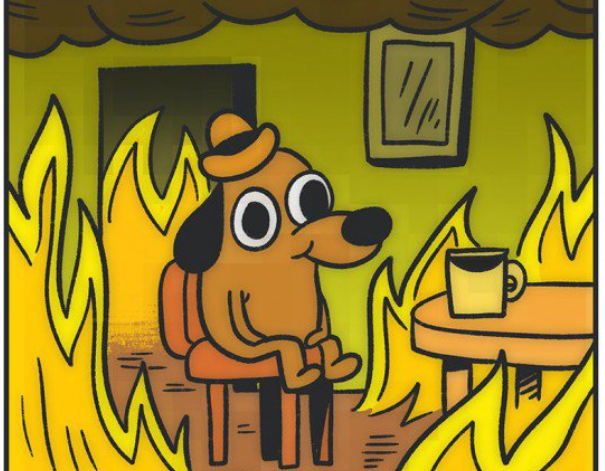

# Вывод
## В ходе данной лабораторной работы были изучены алгоритмы стека и дека, что позволило разработать программу для обработки данных, результат которой представляется в txt-файле.